In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
dataset = pd.read_csv('dataset_covid.csv')

In [175]:
df = dataset.copy()

In [176]:
df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462


In [177]:
df.shape

(231744, 6)

In [178]:
df.duplicated().sum()

0

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231744 entries, 0 to 231743
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            231744 non-null  object 
 1   Country/Region  231744 non-null  object 
 2   Province/State  72624 non-null   object 
 3   Confirmed       231744 non-null  int64  
 4   Recovered       218688 non-null  float64
 5   Deaths          231744 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.6+ MB


In [180]:
new_columns = [
    'date',
    'country/region',
    'province/state',
    'confirmed',
    'recovered',
    'deaths'
]

df.columns = new_columns

In [181]:
df

,date,country/region,province/state,confirmed,recovered,deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231744 entries, 0 to 231743
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            231744 non-null  object 
 1   country/region  231744 non-null  object 
 2   province/state  72624 non-null   object 
 3   confirmed       231744 non-null  int64  
 4   recovered       218688 non-null  float64
 5   deaths          231744 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.6+ MB


In [183]:
df['date'].nunique()

816

In [184]:
df['country/region'].nunique()

198

In [185]:
df['province/state'].nunique()

89

In [186]:
df.isna().sum()

date                   0
country/region         0
province/state    159120
confirmed              0
recovered          13056
deaths                 0
dtype: int64

# EDA

## date

In [187]:
df['date'].nunique()

816

In [188]:
df['date'].unique()[:50]

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11'], dtype=object)

In [189]:
# convert data type ke date time

df['date'] = pd.to_datetime(df['date'])
df['date']

0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
231739   2022-04-12
231740   2022-04-13
231741   2022-04-14
231742   2022-04-15
231743   2022-04-16
Name: date, Length: 231744, dtype: datetime64[ns]

In [190]:
# Display range Invoice Date
oldest_date = df['date'].min()
newest_date = df['date'].max()

print("Oldest Covid Date:", oldest_date)
print("Newest Covid Date:", newest_date)

Oldest Covid Date: 2020-01-22 00:00:00
Newest Covid Date: 2022-04-16 00:00:00


In [191]:
# extract month (bulan)

df['month'] = df['date'].dt.month
df['month']

0         1
1         1
2         1
3         1
4         1
         ..
231739    4
231740    4
231741    4
231742    4
231743    4
Name: month, Length: 231744, dtype: int32

## month

In [192]:
# Display range month
min_month = df['month'].min()
max_month = df['month'].max()

print("Min Month:", min_month)
print("Max Month:", max_month)

Min Month: 1
Max Month: 12


## year

In [193]:
# extract year (tahun)

df['year'] = df['date'].dt.year
df['year']

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
231739    2022
231740    2022
231741    2022
231742    2022
231743    2022
Name: year, Length: 231744, dtype: int32

In [194]:
# Display range year
min_year = df['year'].min()
max_year = df['year'].max()

print("Min Year:", min_year)
print("Max Year:", max_year)

Min Year: 2020
Max Year: 2022


## day

In [195]:
# extract day (hari)

df['day'] = df['date'].dt.day
df['day']

0         22
1         23
2         24
3         25
4         26
          ..
231739    12
231740    13
231741    14
231742    15
231743    16
Name: day, Length: 231744, dtype: int32

In [196]:
# Display range day
min_day = df['day'].min()
max_day = df['day'].max()

print("Min Day:", min_day)
print("Max Day:", max_day)

Min Day: 1
Max Day: 31


In [197]:
df

,date,country/region,province/state,confirmed,recovered,deaths,month,year,day
0,2020-01-22,Afghanistan,NaN,0,0.0,0,1,2020,22
1,2020-01-23,Afghanistan,NaN,0,0.0,0,1,2020,23
2,2020-01-24,Afghanistan,NaN,0,0.0,0,1,2020,24
3,2020-01-25,Afghanistan,NaN,0,0.0,0,1,2020,25
4,2020-01-26,Afghanistan,NaN,0,0.0,0,1,2020,26
...,...,...,...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460,4,2022,12
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460,4,2022,13
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462,4,2022,14
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462,4,2022,15


In [198]:
df['day_of_week'] = df['date'].dt.dayofweek

# kategorisasi hari berdasarkan 'Workday' dan 'Weekend'
def kategori_day(day_of_week):
    if day_of_week < 5:  # 0-4 workdays (Senin sd Jumat)
        return 'Workday'
    else:  # 5-6 weekends (Sabtu n Minggu)
        return 'Weekend'

df['jenis_day'] = df['day_of_week'].apply(kategori_day)

In [199]:
df

,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day
0,2020-01-22,Afghanistan,NaN,0,0.0,0,1,2020,22,2,Workday
1,2020-01-23,Afghanistan,NaN,0,0.0,0,1,2020,23,3,Workday
2,2020-01-24,Afghanistan,NaN,0,0.0,0,1,2020,24,4,Workday
3,2020-01-25,Afghanistan,NaN,0,0.0,0,1,2020,25,5,Weekend
4,2020-01-26,Afghanistan,NaN,0,0.0,0,1,2020,26,6,Weekend
...,...,...,...,...,...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460,4,2022,12,1,Workday
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460,4,2022,13,2,Workday
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462,4,2022,14,3,Workday
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462,4,2022,15,4,Workday


In [200]:
df.isna().sum()

date                   0
country/region         0
province/state    159120
confirmed              0
recovered          13056
deaths                 0
month                  0
year                   0
day                    0
day_of_week            0
jenis_day              0
dtype: int64

# country/region

In [201]:
df['country/region'].nunique()

198

In [202]:
df['country/region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [203]:
df[df['province/state'].notna()]['country/region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

In [204]:
# Memfilter baris yang kolom 'province/state' tidak null
df_non_null_province = df[df['province/state'].notna()]

# Mengelompokkan berdasarkan 'country/region' dan menghitung jumlah 'province/state' untuk setiap negara
province_counts = df_non_null_province.groupby('country/region')['province/state'].count()

province_counts

country/region
Australia          6528
Canada            13056
China             27744
Denmark            1632
France             8976
Netherlands        3264
New Zealand         816
United Kingdom    10608
Name: province/state, dtype: int64

In [205]:
df[df['province/state'].notna()].groupby('country/region')['province/state'].nunique()

country/region
Australia          8
Canada            16
China             34
Denmark            2
France            11
Netherlands        4
New Zealand        1
United Kingdom    13
Name: province/state, dtype: int64

In [206]:
df[df['country/region'] == 'Antarctica']['confirmed'].max()

11

In [207]:
df['province/state'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

### Normalisasi country/region

In [208]:
non_countries = [
    'Diamond Princess', 'Holy See', 'MS Zaandam', 'Summer Olympics 2020', 
    'West Bank and Gaza', 'Winter Olympics 2022'
]

nama_country_geojson_map = {
    'Burma': 'Myanmar',
    'Congo (Brazzaville)': 'Republic of the Congo',
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    "Cote d'Ivoire": 'Ivory Coast',
    'Czechia': 'Czech Republic',
    'Eswatini': 'Swaziland',
    'Korea, South': 'South Korea',
    'Taiwan*': 'Taiwan',
    'US': 'United States of America'
}

df['country/region'] = df['country/region'].replace(nama_country_geojson_map)
df = df[df['country/region'].apply(lambda x: x not in non_countries)]

In [209]:
df['country/region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Myanmar',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Republic of the Congo',
       'Democratic Republic of the Congo', 'Costa Rica', 'Ivory Coast',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Swaziland', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada'

In [210]:
df['country/region'].nunique()

192

In [211]:
benua_dict = {
    'Asia': ['Taiwan', 'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'],
    'Africa': ['Swaziland', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Republic of the Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States of America'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'Antarctica': ['Antarctica']
}


In [212]:
benua_mapping = {country: benua for benua, countries in benua_dict.items() for country in countries}

df['benua'] = df['country/region'].map(benua_mapping)

df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37128\715562662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['benua'] = df['country/region'].map(benua_mapping)


,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day,benua
0,2020-01-22,Afghanistan,NaN,0,0.0,0,1,2020,22,2,Workday,Asia
1,2020-01-23,Afghanistan,NaN,0,0.0,0,1,2020,23,3,Workday,Asia
2,2020-01-24,Afghanistan,NaN,0,0.0,0,1,2020,24,4,Workday,Asia
3,2020-01-25,Afghanistan,NaN,0,0.0,0,1,2020,25,5,Weekend,Asia
4,2020-01-26,Afghanistan,NaN,0,0.0,0,1,2020,26,6,Weekend,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460,4,2022,12,1,Workday,Africa
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460,4,2022,13,2,Workday,Africa
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462,4,2022,14,3,Workday,Africa
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462,4,2022,15,4,Workday,Africa


In [213]:
df.isna().sum()

date                   0
country/region         0
province/state    154224
confirmed              0
recovered          13056
deaths                 0
month                  0
year                   0
day                    0
day_of_week            0
jenis_day              0
benua                  0
dtype: int64

In [214]:
df[df['benua'].isna()]['country/region'].unique()

array([], dtype=object)

## Seasons US

In [215]:
df_us = df[df['country/region']=='United States of America']

In [216]:
df_us

,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day,benua
208896,2020-01-22,United States of America,NaN,1,0.0,0,1,2020,22,2,Workday,North America
208897,2020-01-23,United States of America,NaN,1,0.0,0,1,2020,23,3,Workday,North America
208898,2020-01-24,United States of America,NaN,2,0.0,0,1,2020,24,4,Workday,North America
208899,2020-01-25,United States of America,NaN,2,0.0,0,1,2020,25,5,Weekend,North America
208900,2020-01-26,United States of America,NaN,5,0.0,0,1,2020,26,6,Weekend,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
209707,2022-04-12,United States of America,NaN,80477797,0.0,986387,4,2022,12,1,Workday,North America
209708,2022-04-13,United States of America,NaN,80518989,0.0,987343,4,2022,13,2,Workday,North America
209709,2022-04-14,United States of America,NaN,80573532,0.0,988121,4,2022,14,3,Workday,North America
209710,2022-04-15,United States of America,NaN,80612681,0.0,988558,4,2022,15,4,Workday,North America


In [217]:
def find_seasons(country, month):
    if country == 'United States of America':
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Autumn'

df_us['season'] = df.apply(lambda row: find_seasons(row['country/region'], row['month']), axis=1)

df_us

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37128\656259367.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['season'] = df.apply(lambda row: find_seasons(row['country/region'], row['month']), axis=1)


,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day,benua,season
208896,2020-01-22,United States of America,NaN,1,0.0,0,1,2020,22,2,Workday,North America,Winter
208897,2020-01-23,United States of America,NaN,1,0.0,0,1,2020,23,3,Workday,North America,Winter
208898,2020-01-24,United States of America,NaN,2,0.0,0,1,2020,24,4,Workday,North America,Winter
208899,2020-01-25,United States of America,NaN,2,0.0,0,1,2020,25,5,Weekend,North America,Winter
208900,2020-01-26,United States of America,NaN,5,0.0,0,1,2020,26,6,Weekend,North America,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209707,2022-04-12,United States of America,NaN,80477797,0.0,986387,4,2022,12,1,Workday,North America,Spring
209708,2022-04-13,United States of America,NaN,80518989,0.0,987343,4,2022,13,2,Workday,North America,Spring
209709,2022-04-14,United States of America,NaN,80573532,0.0,988121,4,2022,14,3,Workday,North America,Spring
209710,2022-04-15,United States of America,NaN,80612681,0.0,988558,4,2022,15,4,Workday,North America,Spring


In [218]:
df_us.to_csv('US_covid_data.csv', index=False)

## Seasons Indonesia

In [219]:
df_ind = df[df['country/region']=='Indonesia']
df_ind

,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day,benua
121584,2020-01-22,Indonesia,NaN,0,0.0,0,1,2020,22,2,Workday,Asia
121585,2020-01-23,Indonesia,NaN,0,0.0,0,1,2020,23,3,Workday,Asia
121586,2020-01-24,Indonesia,NaN,0,0.0,0,1,2020,24,4,Workday,Asia
121587,2020-01-25,Indonesia,NaN,0,0.0,0,1,2020,25,5,Weekend,Asia
121588,2020-01-26,Indonesia,NaN,0,0.0,0,1,2020,26,6,Weekend,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,2022-04-12,Indonesia,NaN,6035358,0.0,155717,4,2022,12,1,Workday,Asia
122396,2022-04-13,Indonesia,NaN,6036909,0.0,155746,4,2022,13,2,Workday,Asia
122397,2022-04-14,Indonesia,NaN,6037742,0.0,155794,4,2022,14,3,Workday,Asia
122398,2022-04-15,Indonesia,NaN,6038664,0.0,155820,4,2022,15,4,Workday,Asia


In [220]:
def find_seasons(country, month):
    if country == 'Indonesia':
        if month in [10, 11, 12, 1, 2, 3]:
            return 'Wet Season'
        else:
            return 'Dry Season'

df_ind['season'] = df.apply(lambda row: find_seasons(row['country/region'], row['month']), axis=1)

df_ind

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37128\1715387361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind['season'] = df.apply(lambda row: find_seasons(row['country/region'], row['month']), axis=1)


,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day,benua,season
121584,2020-01-22,Indonesia,NaN,0,0.0,0,1,2020,22,2,Workday,Asia,Wet Season
121585,2020-01-23,Indonesia,NaN,0,0.0,0,1,2020,23,3,Workday,Asia,Wet Season
121586,2020-01-24,Indonesia,NaN,0,0.0,0,1,2020,24,4,Workday,Asia,Wet Season
121587,2020-01-25,Indonesia,NaN,0,0.0,0,1,2020,25,5,Weekend,Asia,Wet Season
121588,2020-01-26,Indonesia,NaN,0,0.0,0,1,2020,26,6,Weekend,Asia,Wet Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,2022-04-12,Indonesia,NaN,6035358,0.0,155717,4,2022,12,1,Workday,Asia,Dry Season
122396,2022-04-13,Indonesia,NaN,6036909,0.0,155746,4,2022,13,2,Workday,Asia,Dry Season
122397,2022-04-14,Indonesia,NaN,6037742,0.0,155794,4,2022,14,3,Workday,Asia,Dry Season
122398,2022-04-15,Indonesia,NaN,6038664,0.0,155820,4,2022,15,4,Workday,Asia,Dry Season


In [221]:
df_ind.to_csv('US_covid_data.csv', index=False)

In [222]:
#     'Four Seasons': ['United States of America', 'Canada', 'Russia', 'China', 'Japan', 'South Korea', 'United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Poland', 'Romania', 'Hungary', 'Czech Republic', 'Slovakia', 'Austria', 'Switzerland', 'Belgium', 'Netherlands', 'Denmark', 'Sweden', 'Norway', 'Finland', 'Iceland', 'Ireland'],
#     'Tropical/Subtropical': ['Australia', 'Brazil', 'Mexico', 'India', 'Indonesia', 'Philippines', 'Thailand', 'Vietnam', 'Malaysia', 'Singapore', 'South Africa', 'Cuba', 'Dominican Republic', 'Puerto Rico', 'Jamaica', 'Haiti', 'Bahamas', 'Belize', 'Costa Rica', 'Panama', 'Colombia', 'Venezuela', 'Ecuador', 'Peru', 'Bolivia', 'Argentina', 'Chile', 'New Zealand', 'Fiji', 'Samoa', 'Tonga', 'Vanuatu', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Palau', 'Tuvalu', 'Cook Islands', 'French Polynesia', 'New Caledonia', 'Papua New Guinea', 'Solomon Islands', 'Timor-Leste', 'Guinea-Bissau', 'Gabon', 'Equatorial Guinea', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Cameroon', 'Nigeria', 'Ghana', 'Ivory Coast', 'Senegal', 'Mali', 'Burkina Faso', 'Chad', 'Sudan', 'Somalia', 'Kenya', 'Tanzania', 'Uganda', 'Rwanda', 'Burundi', 'Malawi', 'Zambia', 'Zimbabwe', 'Botswana', 'Namibia', 'Mozambique', 'Angola', 'Madagascar', 'Comoros', 'Seychelles'],
#     'Polar': ['Antarctica', 'Greenland']
# }

In [223]:
# negara_4_musim = [
#     'Afghanistan', 'Albania', 'Andorra', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 
#     'Belgium', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria', 'Canada', 'Chile', 'China', 'Croatia', 
#     'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 
#     'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kosovo', 'Kyrgyzstan', 
#     'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Moldova', 'Monaco', 'Mongolia', 
#     'Montenegro', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 
#     'Romania', 'Russia', 'Serbia', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 
#     'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay'

#     lalala test aja
#     ['United States of America', 'Canada', 'Russia', 'China', 'Japan', 'South Korea', 'United Kingdom', 
#     'Germany', 'France', 'Italy', 'Spain', 'Poland', 'Romania', 'Hungary', 'Czech Republic', 'Slovakia', 
#     'Austria', 'Switzerland', 'Belgium', 'Netherlands', 'Denmark', 'Sweden', 'Norway', 'Finland', 'Iceland', 
#     'Ireland'],
# ]

# negara_2_musim = [
#     'Algeria', 'Angola', 'Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belize', 
#     'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Brunei', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 
#     'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Colombia', 'Comoros', 'Costa Rica', 
#     'Cote d\'Ivoire', 'Cuba', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 
#     'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 
#     'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 
#     'India', 'Indonesia', 'Iraq', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Laos', 'Lebanon', 
#     'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 
#     'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Morocco', 'Mozambique', 
#     'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Oman', 'Pakistan', 'Palau', 'Panama', 
#     'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Qatar', 'Rwanda', 'Saint Kitts and Nevis', 
#     'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 
#     'Saudi Arabia', 'Senegal', 'Seychelles', 'Sierra Leone', 'Singapore', 'Solomon Islands', 
#     'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Taiwan*', 'Tajikistan', 
#     'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Uganda', 
#     'United Arab Emirates', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 
#     'Yemen', 'Zambia', 'Zimbabwe'
# ]

# negara_polar_iklim = [
#     'Antarctica'
# ]

# df['jenis_seasons'] = df['country/region'].apply(
#     lambda x: 'Four Seasons' if x in negara_4_musim else (
#         'Tropical/Subtropical' if x in negara_2_musim else (
#             'Polar' if x in negara_polar_iklim else 'Other'
#         )
#     )
# )

In [224]:
df

,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day,benua
0,2020-01-22,Afghanistan,NaN,0,0.0,0,1,2020,22,2,Workday,Asia
1,2020-01-23,Afghanistan,NaN,0,0.0,0,1,2020,23,3,Workday,Asia
2,2020-01-24,Afghanistan,NaN,0,0.0,0,1,2020,24,4,Workday,Asia
3,2020-01-25,Afghanistan,NaN,0,0.0,0,1,2020,25,5,Weekend,Asia
4,2020-01-26,Afghanistan,NaN,0,0.0,0,1,2020,26,6,Weekend,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460,4,2022,12,1,Workday,Africa
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460,4,2022,13,2,Workday,Africa
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462,4,2022,14,3,Workday,Africa
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462,4,2022,15,4,Workday,Africa


In [225]:
df.isna().sum()

date                   0
country/region         0
province/state    154224
confirmed              0
recovered          13056
deaths                 0
month                  0
year                   0
day                    0
day_of_week            0
jenis_day              0
benua                  0
dtype: int64

In [226]:
# df['jenis_seasons'].unique()

In [227]:
# df[df['jenis_seasons']=='Other'] 

## Seasons

In [228]:
# def find_seasons(country, month):
#     if country in negara_4_musim:
#         if month in [12, 1, 2]:
#             return 'Winter'
#         elif month in [3, 4, 5]:
#             return 'Spring'
#         elif month in [6, 7, 8]:
#             return 'Summer'
#         elif month in [9, 10, 11]:
#             return 'Autumn'
#     elif country == 'Indonesia':
#         if month in [10, 11, 12, 1, 2, 3]:
#             return 'Wet Season'
#         else:
#             return 'Dry Season'
#     elif country in negara_2_musim:
#         if month in [5, 6, 7, 8, 9, 10]:
#             return 'Wet Season'
#         else:
#             return 'Dry Season'
#     elif country in negara_polar_iklim:
#         if month in [11, 12, 1, 2, 3]:
#             return 'Winter'
#         else:
#             return 'Summer'
#     else:
#         return 'Unknown'

# df['season'] = df.apply(lambda row: find_seasons(row['country/region'], row['month']), axis=1)

# df

# province/state

In [229]:
df['province/state'].nunique()

89

In [230]:
df['province/state'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226848 entries, 0 to 231743
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            226848 non-null  datetime64[ns]
 1   country/region  226848 non-null  object        
 2   province/state  72624 non-null   object        
 3   confirmed       226848 non-null  int64         
 4   recovered       213792 non-null  float64       
 5   deaths          226848 non-null  int64         
 6   month           226848 non-null  int32         
 7   year            226848 non-null  int32         
 8   day             226848 non-null  int32         
 9   day_of_week     226848 non-null  int32         
 10  jenis_day       226848 non-null  object        
 11  benua           226848 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(4)
memory usage: 27.1+ MB


# confirmed

In [232]:
df['confirmed'].describe()

count    2.268480e+05
mean     5.234837e+05
std      3.033593e+06
min      0.000000e+00
25%      2.920000e+02
50%      6.141000e+03
75%      1.155250e+05
max      8.062512e+07
Name: confirmed, dtype: float64

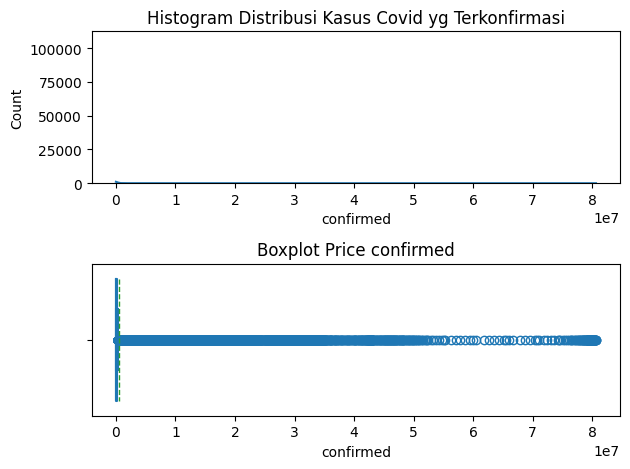

In [43]:
# Membentuk plot confirmed
plt.subplot(2,1,1)
sns.histplot(df['confirmed'], kde=True)
plt.title('Histogram Distribusi Kasus Covid yg Terkonfirmasi')

plt.subplot(2,1,2)
sns.boxplot(data=df, x='confirmed', showmeans=True, meanline = True, fill=False)
plt.title('Boxplot Price confirmed')

plt.tight_layout()
plt.show()

# recovered

In [157]:
df['recovered'].describe()

count    2.137920e+05
mean     1.083729e+05
std      8.491445e+05
min      0.000000e+00
25%      0.000000e+00
50%      7.100000e+01
75%      5.335250e+03
max      3.097475e+07
Name: recovered, dtype: float64

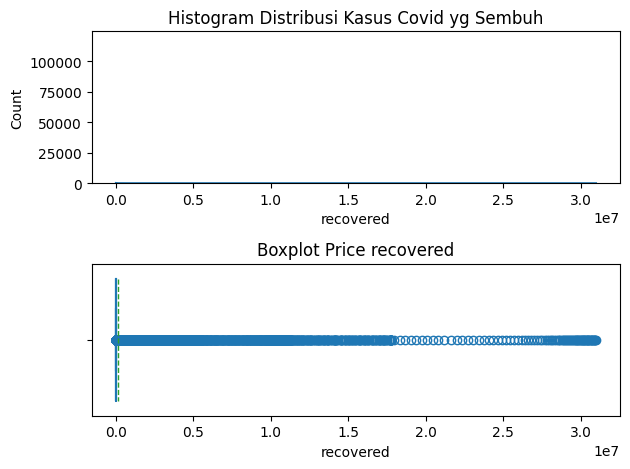

In [45]:
# Membentuk plot confirmed
plt.subplot(2,1,1)
sns.histplot(df['recovered'], kde=True)
plt.title('Histogram Distribusi Kasus Covid yg Sembuh')

plt.subplot(2,1,2)
sns.boxplot(data=df, x='recovered', showmeans=True, meanline = True, fill=False)
plt.title('Boxplot Price recovered')

plt.tight_layout()
plt.show()

In [158]:
df[df['recovered'].isna()].groupby('country/region')['recovered'].count()

country/region
Canada    0
Name: recovered, dtype: int64

In [159]:
df.isna().sum()

date                   0
country/region         0
province/state    154224
confirmed              0
recovered          13056
deaths                 0
month                  0
year                   0
day                    0
day_of_week            0
jenis_day              0
benua                  0
dtype: int64

In [233]:
# UNique country recovered null
df[df['recovered'].isna()]['country/region'].unique()

array(['Canada'], dtype=object)

In [234]:
# UNique country recovered null
df[df['recovered'].notna()]['country/region'].nunique()

191

# deaths

In [162]:
df['deaths'].describe()

count    226848.000000
mean       9962.422675
std       50264.312723
min           0.000000
25%           2.000000
50%          82.000000
75%        1855.000000
max      988609.000000
Name: deaths, dtype: float64

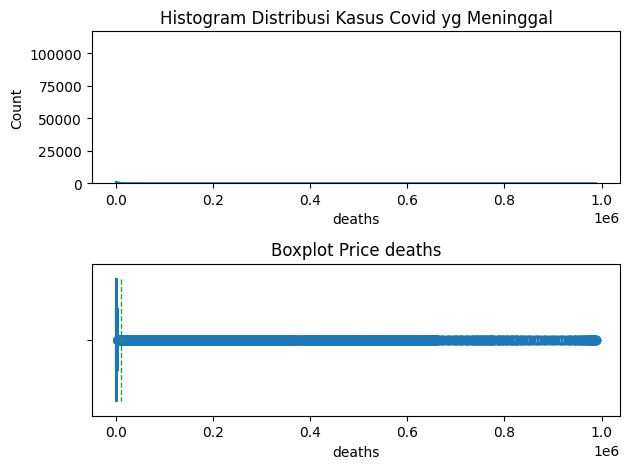

In [59]:
# Membentuk plot confirmed
plt.subplot(2,1,1)
sns.histplot(df['deaths'], kde=True)
plt.title('Histogram Distribusi Kasus Covid yg Meninggal')

plt.subplot(2,1,2)
sns.boxplot(data=df, x='deaths', showmeans=True, meanline = True, fill=False)
plt.title('Boxplot Price deaths')

plt.tight_layout()
plt.show()

# Akumulasi confirmed, recovered, death untuk negara yang memiliki state berdasarkan date nya

In [235]:
df

,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day,benua
0,2020-01-22,Afghanistan,NaN,0,0.0,0,1,2020,22,2,Workday,Asia
1,2020-01-23,Afghanistan,NaN,0,0.0,0,1,2020,23,3,Workday,Asia
2,2020-01-24,Afghanistan,NaN,0,0.0,0,1,2020,24,4,Workday,Asia
3,2020-01-25,Afghanistan,NaN,0,0.0,0,1,2020,25,5,Weekend,Asia
4,2020-01-26,Afghanistan,NaN,0,0.0,0,1,2020,26,6,Weekend,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460,4,2022,12,1,Workday,Africa
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460,4,2022,13,2,Workday,Africa
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462,4,2022,14,3,Workday,Africa
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462,4,2022,15,4,Workday,Africa


In [236]:
# hitung nilai total confirmed, recovered, deaths
df['total_confirmed'] = df.groupby(['country/region', 'date'])['confirmed'].transform('sum')
df['total_recovered'] = df.groupby(['country/region', 'date'])['recovered'].transform('sum')
df['total_deaths'] = df.groupby(['country/region', 'date'])['deaths'].transform('sum')

# Aggregate avg ke country level 
# country_level_data = df.groupby(['country/region', 'date'])[['avg_confirmed', 'avg_recovered', 'avg_deaths']].mean().reset_index()

# country_level_data = df.groupby(['country/region', 'date', 'month', 'year', 'day', 'day_of_week', 'jenis_day', 'benua', 'jenis_seasons', 'season'])[['avg_confirmed', 'avg_recovered', 'avg_deaths']].mean().reset_index()
country_level_data = df.groupby(['country/region', 'date', 'month', 'year', 'day', 'day_of_week', 'jenis_day', 'benua'])[['total_confirmed', 'total_recovered', 'total_deaths']].sum().reset_index()

country_level_data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37128\3487370291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_confirmed'] = df.groupby(['country/region', 'date'])['confirmed'].transform('sum')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37128\3487370291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_recovered'] = df.groupby(['country/region', 'date'])['recovered'].transform('sum')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37128\3487370291.py:4: SettingWithCopyWarning: 
A val

,country/region,date,month,year,day,day_of_week,jenis_day,benua,total_confirmed,total_recovered,total_deaths
0,Afghanistan,2020-01-22,1,2020,22,2,Workday,Asia,0,0.0,0
1,Afghanistan,2020-01-23,1,2020,23,3,Workday,Asia,0,0.0,0
2,Afghanistan,2020-01-24,1,2020,24,4,Workday,Asia,0,0.0,0
3,Afghanistan,2020-01-25,1,2020,25,5,Weekend,Asia,0,0.0,0
4,Afghanistan,2020-01-26,1,2020,26,6,Weekend,Asia,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
156667,Zimbabwe,2022-04-12,4,2022,12,1,Workday,Africa,247094,0.0,5460
156668,Zimbabwe,2022-04-13,4,2022,13,2,Workday,Africa,247160,0.0,5460
156669,Zimbabwe,2022-04-14,4,2022,14,3,Workday,Africa,247208,0.0,5462
156670,Zimbabwe,2022-04-15,4,2022,15,4,Workday,Africa,247237,0.0,5462


In [244]:
df

,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day,benua,total_confirmed,total_recovered,total_deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0,1,2020,22,2,Workday,Asia,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0,1,2020,23,3,Workday,Asia,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0,1,2020,24,4,Workday,Asia,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0,1,2020,25,5,Weekend,Asia,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0,1,2020,26,6,Weekend,Asia,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460,4,2022,12,1,Workday,Africa,247094,0.0,5460
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460,4,2022,13,2,Workday,Africa,247160,0.0,5460
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462,4,2022,14,3,Workday,Africa,247208,0.0,5462
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462,4,2022,15,4,Workday,Africa,247237,0.0,5462


In [246]:
df[df['country/region']=='Australia']

,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day,benua,total_confirmed,total_recovered,total_deaths
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,1,2020,22,2,Workday,Oceania,0,0.0,0
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,1,2020,23,3,Workday,Oceania,0,0.0,0
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,1,2020,24,4,Workday,Oceania,0,0.0,0
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,1,2020,25,5,Weekend,Oceania,0,0.0,0
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,1,2020,26,6,Weekend,Oceania,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13867,2022-04-12,Australia,Western Australia,265423,0.0,87,4,2022,12,1,Workday,Oceania,5207650,0.0,6648
13868,2022-04-13,Australia,Western Australia,273520,0.0,89,4,2022,13,2,Workday,Oceania,5262359,0.0,6693
13869,2022-04-14,Australia,Western Australia,281439,0.0,90,4,2022,14,3,Workday,Oceania,5308858,0.0,6727
13870,2022-04-15,Australia,Western Australia,281400,0.0,90,4,2022,15,4,Workday,Oceania,5345438,0.0,6755


In [247]:
country_level_data[country_level_data['country/region']=='Australia']

,country/region,date,month,year,day,day_of_week,jenis_day,benua,total_confirmed,total_recovered,total_deaths
7344,Australia,2020-01-22,1,2020,22,2,Workday,Oceania,0,0.0,0
7345,Australia,2020-01-23,1,2020,23,3,Workday,Oceania,0,0.0,0
7346,Australia,2020-01-24,1,2020,24,4,Workday,Oceania,0,0.0,0
7347,Australia,2020-01-25,1,2020,25,5,Weekend,Oceania,0,0.0,0
7348,Australia,2020-01-26,1,2020,26,6,Weekend,Oceania,32,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
8155,Australia,2022-04-12,4,2022,12,1,Workday,Oceania,41661200,0.0,53184
8156,Australia,2022-04-13,4,2022,13,2,Workday,Oceania,42098872,0.0,53544
8157,Australia,2022-04-14,4,2022,14,3,Workday,Oceania,42470864,0.0,53816
8158,Australia,2022-04-15,4,2022,15,4,Workday,Oceania,42763504,0.0,54040


In [248]:
country_level_data.describe()

,date,month,year,day,day_of_week,total_confirmed,total_recovered,total_deaths
count,156672,156672.000000,156672.000000,156672.000000,156672.000000,1.566720e+05,1.566720e+05,1.566720e+05
mean,2021-03-04 11:59:59.999999232,6.113971,2020.707108,15.696078,3.002451,1.611811e+06,1.658930e+05,2.772456e+04
min,2020-01-22 00:00:00,1.000000,2020.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2020-08-12 18:00:00,3.000000,2020.000000,8.000000,1.000000,1.844750e+03,0.000000e+00,2.800000e+01
50%,2021-03-04 12:00:00,6.000000,2021.000000,16.000000,3.000000,2.756200e+04,1.560000e+02,4.330000e+02
75%,2021-09-24 06:00:00,9.000000,2021.000000,23.000000,5.000000,2.896715e+05,2.022925e+04,5.331000e+03
max,2022-04-16 00:00:00,12.000000,2022.000000,31.000000,6.000000,3.344912e+08,3.097475e+07,2.408196e+06
std,NaN,3.487805,0.683311,8.816556,1.996939,1.183607e+07,1.013712e+06,1.464470e+05


In [249]:
country_level_data.isna().sum()

country/region     0
date               0
month              0
year               0
day                0
day_of_week        0
jenis_day          0
benua              0
total_confirmed    0
total_recovered    0
total_deaths       0
dtype: int64

In [250]:
country_level_data[country_level_data['total_recovered'].isna()]

,country/region,date,month,year,day,day_of_week,jenis_day,benua,total_confirmed,total_recovered,total_deaths


In [251]:
df[df['country/region']=='Canada']

,date,country/region,province/state,confirmed,recovered,deaths,month,year,day,day_of_week,jenis_day,benua,total_confirmed,total_recovered,total_deaths
32640,2020-01-22,Canada,Alberta,0,NaN,0,1,2020,22,2,Workday,North America,0,0.0,0
32641,2020-01-23,Canada,Alberta,0,NaN,0,1,2020,23,3,Workday,North America,2,0.0,0
32642,2020-01-24,Canada,Alberta,0,NaN,0,1,2020,24,4,Workday,North America,3,0.0,0
32643,2020-01-25,Canada,Alberta,0,NaN,0,1,2020,25,5,Weekend,North America,3,0.0,0
32644,2020-01-26,Canada,Alberta,0,NaN,0,1,2020,26,6,Weekend,North America,3,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45691,2022-04-12,Canada,Yukon,3940,NaN,24,4,2022,12,1,Workday,North America,3545510,0.0,37928
45692,2022-04-13,Canada,Yukon,4000,NaN,24,4,2022,13,2,Workday,North America,3609318,0.0,38189
45693,2022-04-14,Canada,Yukon,4015,NaN,24,4,2022,14,3,Workday,North America,3628263,0.0,38317
45694,2022-04-15,Canada,Yukon,4015,NaN,24,4,2022,15,4,Workday,North America,3620217,0.0,38297


In [252]:
country_level_data[country_level_data['country/region']=='Canada']

,country/region,date,month,year,day,day_of_week,jenis_day,benua,total_confirmed,total_recovered,total_deaths
26112,Canada,2020-01-22,1,2020,22,2,Workday,North America,0,0.0,0
26113,Canada,2020-01-23,1,2020,23,3,Workday,North America,32,0.0,0
26114,Canada,2020-01-24,1,2020,24,4,Workday,North America,48,0.0,0
26115,Canada,2020-01-25,1,2020,25,5,Weekend,North America,48,0.0,0
26116,Canada,2020-01-26,1,2020,26,6,Weekend,North America,48,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
26923,Canada,2022-04-12,4,2022,12,1,Workday,North America,56728160,0.0,606848
26924,Canada,2022-04-13,4,2022,13,2,Workday,North America,57749088,0.0,611024
26925,Canada,2022-04-14,4,2022,14,3,Workday,North America,58052208,0.0,613072
26926,Canada,2022-04-15,4,2022,15,4,Workday,North America,57923472,0.0,612752


In [253]:
country_level_data

,country/region,date,month,year,day,day_of_week,jenis_day,benua,total_confirmed,total_recovered,total_deaths
0,Afghanistan,2020-01-22,1,2020,22,2,Workday,Asia,0,0.0,0
1,Afghanistan,2020-01-23,1,2020,23,3,Workday,Asia,0,0.0,0
2,Afghanistan,2020-01-24,1,2020,24,4,Workday,Asia,0,0.0,0
3,Afghanistan,2020-01-25,1,2020,25,5,Weekend,Asia,0,0.0,0
4,Afghanistan,2020-01-26,1,2020,26,6,Weekend,Asia,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
156667,Zimbabwe,2022-04-12,4,2022,12,1,Workday,Africa,247094,0.0,5460
156668,Zimbabwe,2022-04-13,4,2022,13,2,Workday,Africa,247160,0.0,5460
156669,Zimbabwe,2022-04-14,4,2022,14,3,Workday,Africa,247208,0.0,5462
156670,Zimbabwe,2022-04-15,4,2022,15,4,Workday,Africa,247237,0.0,5462


# Monthly COVID

In [256]:
monthly_covid = df.groupby(['country/region', 'year', 'month']).agg({
    'total_confirmed': 'sum',
    'total_recovered': 'sum',
    'total_deaths': 'sum',
    'day': 'first',
    'day_of_week': 'first',
    'jenis_day': 'first',
    'benua': 'first',
}).reset_index()

monthly_covid

,country/region,year,month,total_confirmed,total_recovered,total_deaths,day,day_of_week,jenis_day,benua
0,Afghanistan,2020,1,0,0.0,0,22,2,Workday,Asia
1,Afghanistan,2020,2,30,0.0,0,1,5,Weekend,Asia
2,Afghanistan,2020,3,1141,26.0,21,1,6,Weekend,Asia
3,Afghanistan,2020,4,25152,2927.0,812,1,2,Workday,Asia
4,Afghanistan,2020,5,222720,24129.0,4924,1,4,Workday,Asia
...,...,...,...,...,...,...,...,...,...,...
5371,Zimbabwe,2021,12,5481442,0.0,148668,1,2,Workday,Africa
5372,Zimbabwe,2022,1,6964398,0.0,161850,1,5,Weekend,Africa
5373,Zimbabwe,2022,2,6505869,0.0,150520,1,1,Workday,Africa
5374,Zimbabwe,2022,3,7524023,0.0,167954,1,1,Workday,Africa


In [257]:
monthly_covid = monthly_covid.drop(columns=['day', 'day_of_week', 'jenis_day'])

In [258]:
monthly_covid.describe()

,year,month,total_confirmed,total_recovered,total_deaths
count,5376.000000,5376.000000,5.376000e+03,5.376000e+03,5.376000e+03
mean,2020.714286,5.928571,4.697278e+07,4.834596e+06,8.079730e+05
std,0.699919,3.514874,3.372343e+08,2.967038e+07,4.302821e+06
min,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2020.000000,3.000000,4.332650e+04,0.000000e+00,6.300000e+02
50%,2021.000000,5.500000,7.687480e+05,6.548500e+03,1.169500e+04
75%,2021.000000,9.000000,8.553947e+06,6.394642e+05,1.491635e+05
max,2022.000000,12.000000,8.965229e+09,9.365861e+08,7.111866e+07


In [259]:
monthly_covid

,country/region,year,month,total_confirmed,total_recovered,total_deaths,benua
0,Afghanistan,2020,1,0,0.0,0,Asia
1,Afghanistan,2020,2,30,0.0,0,Asia
2,Afghanistan,2020,3,1141,26.0,21,Asia
3,Afghanistan,2020,4,25152,2927.0,812,Asia
4,Afghanistan,2020,5,222720,24129.0,4924,Asia
...,...,...,...,...,...,...,...
5371,Zimbabwe,2021,12,5481442,0.0,148668,Africa
5372,Zimbabwe,2022,1,6964398,0.0,161850,Africa
5373,Zimbabwe,2022,2,6505869,0.0,150520,Africa
5374,Zimbabwe,2022,3,7524023,0.0,167954,Africa


In [260]:
monthly_covid.to_excel('v2_monthly_covid_data.xlsx', index=False)
monthly_covid.to_csv('v2_monthly_covid_data.csv', index=False)

In [261]:
country_level_data.to_csv('country_covid_data.csv', index=False)
df.to_csv('v2_all_covid_data.csv', index=False)

# MONTHLY COVID DATA

In [262]:
monthly_covid

,country/region,year,month,total_confirmed,total_recovered,total_deaths,benua
0,Afghanistan,2020,1,0,0.0,0,Asia
1,Afghanistan,2020,2,30,0.0,0,Asia
2,Afghanistan,2020,3,1141,26.0,21,Asia
3,Afghanistan,2020,4,25152,2927.0,812,Asia
4,Afghanistan,2020,5,222720,24129.0,4924,Asia
...,...,...,...,...,...,...,...
5371,Zimbabwe,2021,12,5481442,0.0,148668,Africa
5372,Zimbabwe,2022,1,6964398,0.0,161850,Africa
5373,Zimbabwe,2022,2,6505869,0.0,150520,Africa
5374,Zimbabwe,2022,3,7524023,0.0,167954,Africa


In [263]:
monthly_totals = df.groupby(['year', 'month']).agg({
    'total_confirmed': 'sum',
    'total_recovered': 'sum',
    'total_deaths': 'sum'
}).reset_index()

In [264]:
monthly_totals

,year,month,total_confirmed,total_recovered,total_deaths
0,2020,1,1293893,2.762700e+04,30226
1,2020,2,55584165,1.282817e+07,1578846
2,2020,3,102061819,6.958376e+07,4097811
3,2020,4,249998707,1.044089e+08,21135738
4,2020,5,430444980,1.568551e+08,41443406
5,2020,6,558586311,2.225396e+08,48391307
6,2020,7,775630258,3.516398e+08,55894129
7,2020,8,1056968671,5.376310e+08,62151647
8,2020,9,1371136835,7.254000e+08,65994963
9,2020,10,2058620752,9.699312e+08,75532261
